In [1]:
from utils.processing import *
from utils.visualisation import *

In [2]:
df = pd.read_csv('data/train.csv')

df = preprocess(df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,tenure_low_year,floor_level_ground,floor_level_high,floor_level_low,floor_level_mid,floor_level_penthouse,floor_level_top,furnishing_partial,furnishing_unfurnished,furnishing_unspecified
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,property_type_public,NA,1988.0,3.0,2.0,1115,...,0,0,0,0,0,0,0,0,0,1


In [3]:
commercial_centres_df = pd.read_csv("./data/auxiliary-data/sg-commerical-centres.csv")
mrt_stations_df = pd.read_csv("./data/auxiliary-data/sg-mrt-stations.csv")
primary_schools_df = pd.read_csv("./data/auxiliary-data/sg-primary-schools.csv")
secondary_schools_df = pd.read_csv("./data/auxiliary-data/sg-secondary-schools.csv")
shopping_malls_df = pd.read_csv("./data/auxiliary-data/sg-shopping-malls.csv")
subzones_df = pd.read_csv("./data/auxiliary-data/sg-subzones.csv")

regions_df = pd.read_csv("./data/extra/sg-regions.csv")

In [4]:
df = join_with_mrt_stations(df, mrt_stations_df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing_unspecified,nearest_mrt_distance_in_km,line_cc,line_ce,line_cg,line_dt,line_ew,line_ne,line_ns,line_te
0,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,1,0.49163,0,0,0,0,1,0,0,0


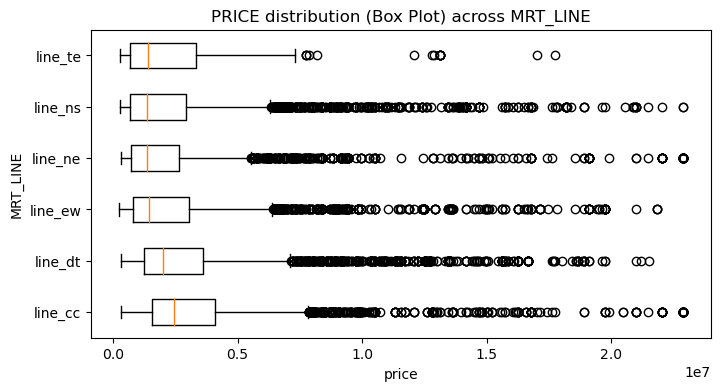

In [5]:
mrt_lines_l = [
    'line_cc',
    'line_dt',
    'line_ew',
    'line_ne',
    'line_ns',
    'line_te'
]

plot_boxplot(df, feature='MRT_LINE', y='price', categories=mrt_lines_l, binary=True, figsize=(8, 4))

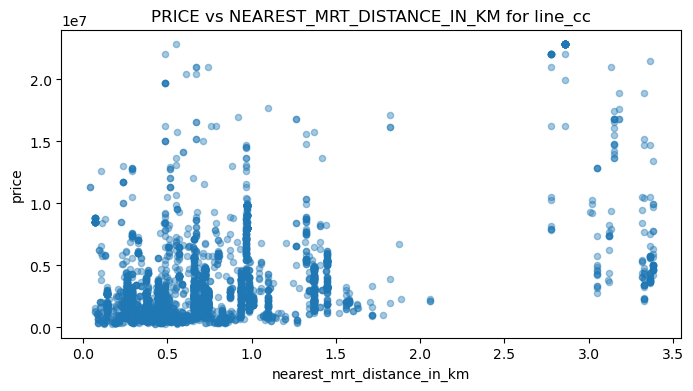

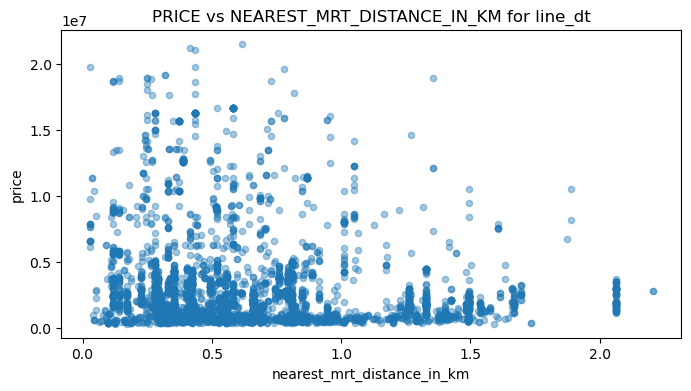

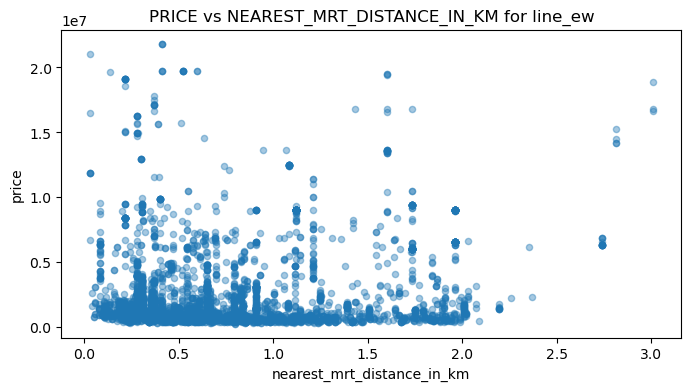

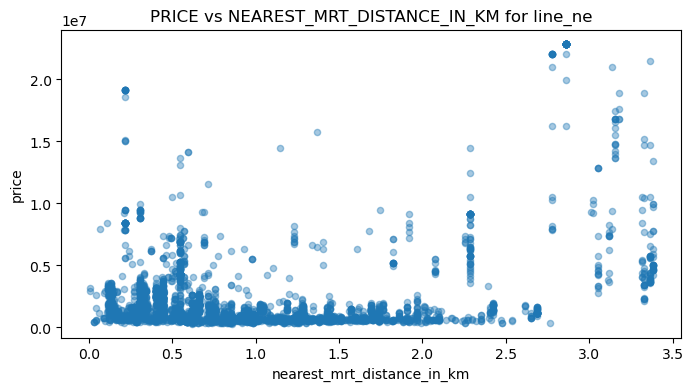

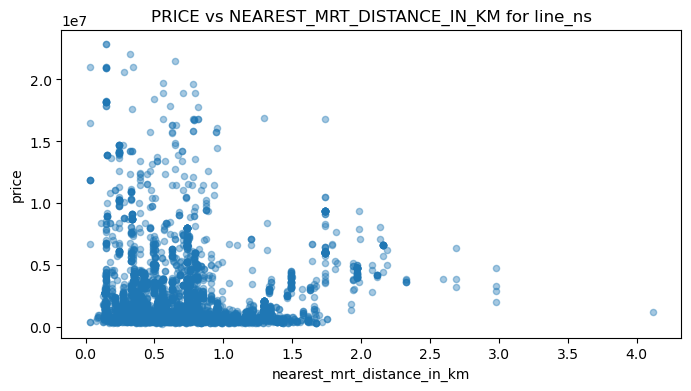

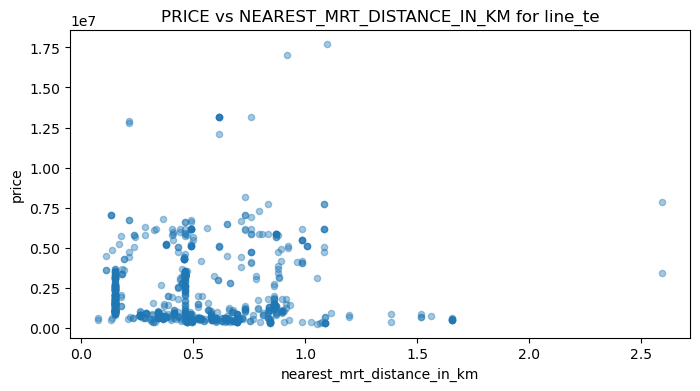

In [6]:
for i in mrt_lines_l: 
    plot_scatterplot(df[df[i]==1], X='nearest_mrt_distance_in_km', y='price', figsize=(8, 4), group=i)

In [7]:
mrt_stations_df.head(1)

,code,line,name,opening_year,lat,lng,subzone,planning_area,key
0,cc1,cc,dhoby ghaut,2010,1.298912,103.846293,dhoby ghaut,museum,0


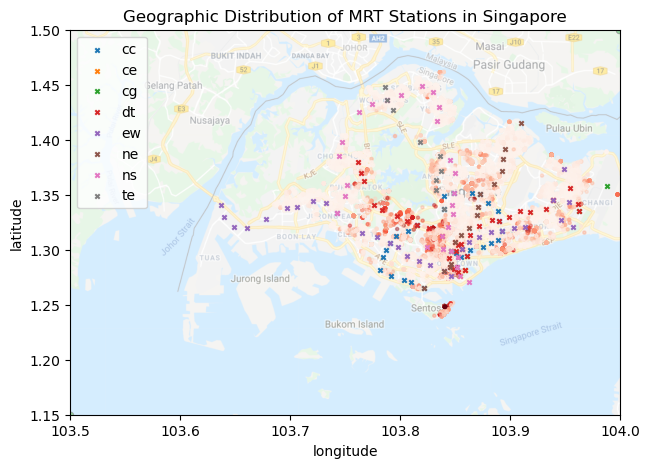

In [8]:
plot_map(df, mrt_stations_df, "Geographic Distribution of MRT Stations in Singapore", group_col="line")

In [9]:
df = join_with_regions(df, regions_df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,nearest_mrt_distance_in_km,line_cc,line_ce,line_cg,line_dt,line_ew,line_ne,line_ns,line_te,region
0,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,0.49163,0,0,0,0,1,0,0,0,c


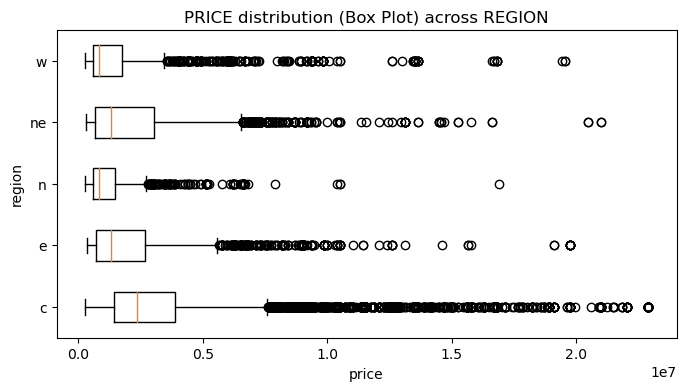

In [10]:
plot_boxplot(df, feature='region', y='price', figsize=(8, 4))

In [11]:
df = join_with_subzones(df, subzones_df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,line_cg,line_dt,line_ew,line_ne,line_ns,line_te,region,area_size,population,density
0,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,0,0,1,0,0,0,c,0.3508,15120,43101.482326


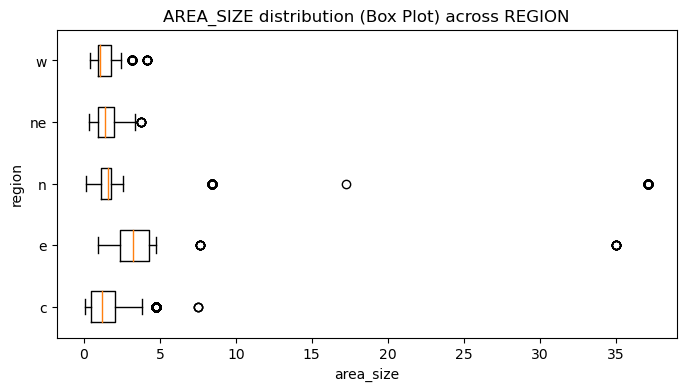

In [12]:
plot_boxplot(df, feature='region', y='area_size', figsize=(8, 4))

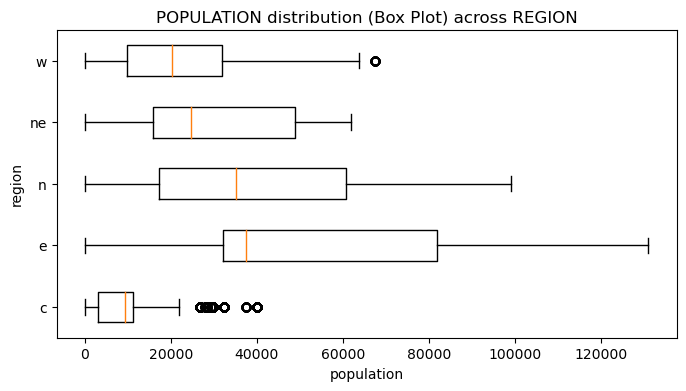

In [13]:
plot_boxplot(df, feature='region', y='population', figsize=(8, 4))

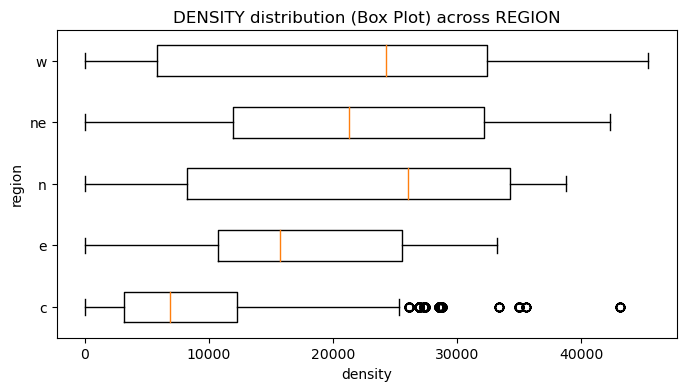

In [14]:
plot_boxplot(df, feature='region', y='density', figsize=(8, 4))

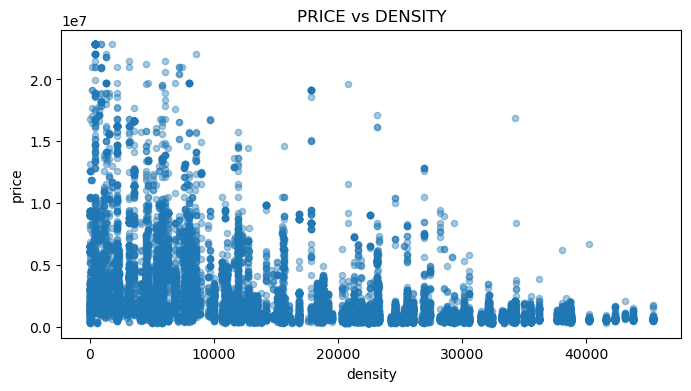

In [15]:
plot_scatterplot(df, X='density', y='price', figsize=(8, 4))

In [16]:
df = join_with_primary_schools(df, primary_schools_df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,area_size,population,density,nearest_pri_sch_distance_in_km,nearest_gep_pri_sch_distance_in_km,gep_pri_sch_within_1km,gep_pri_sch_within_1km_2km,gep_pri_sch_outside_2km,pri_sch_within_500m,pri_sch_outside_500m
0,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,0.3508,15120,43101.482326,0.261718,3.344506,0,0,1,1,0


In [17]:

gep_school_names = [
    'Rosyth School', 
    "St. Hilda's Primary School",
    'Catholic High School (Primary)',
    'Henry Park Primary School',
    'Nan Hua Primary School',
    'Nanyang Primary School',
    'Tao Nan School',
    'Anglo-Chinese School (Primary)',
    "Raffles Girls' Primary School"
]

primary_schools_df['is_gep_pri_sch'] = np.where(primary_schools_df['name'].isin(gep_school_names), 1, 0)

In [18]:
# for visualisation purposes only 
primary_schools_df = primary_schools_df.sort_values(by='is_gep_pri_sch', ascending=False)

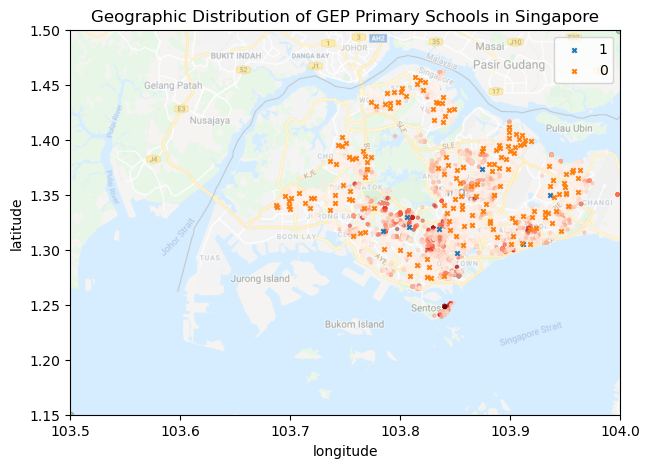

In [19]:
plot_map(df, primary_schools_df, "Geographic Distribution of GEP Primary Schools in Singapore", group_col="is_gep_pri_sch", figsize=(10, 5))

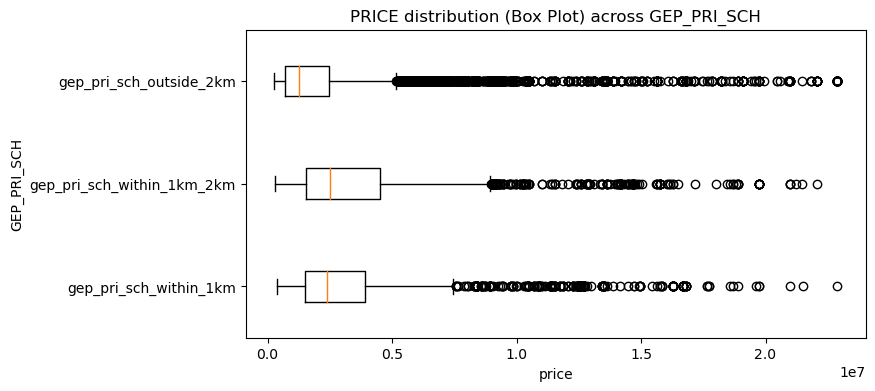

In [20]:
l = ['gep_pri_sch_within_1km', 'gep_pri_sch_within_1km_2km', 'gep_pri_sch_outside_2km']
plot_boxplot(df, feature='GEP_PRI_SCH', y='price', categories=l, binary=True, figsize=(8, 4))

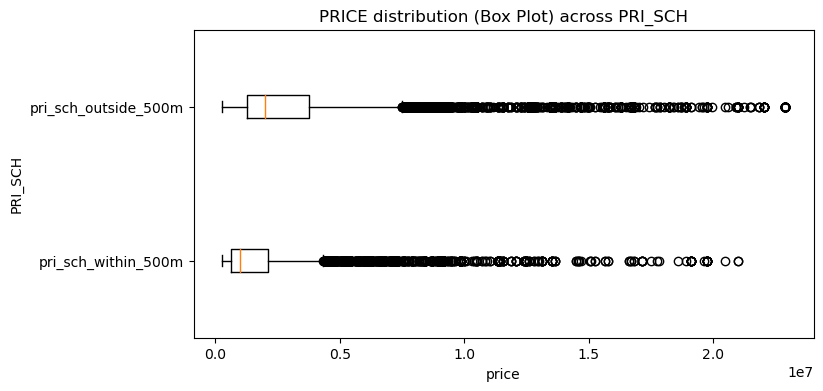

In [21]:
l = ['pri_sch_within_500m','pri_sch_outside_500m']
plot_boxplot(df, feature='PRI_SCH', y='price', categories=l, binary=True, figsize=(8, 4))

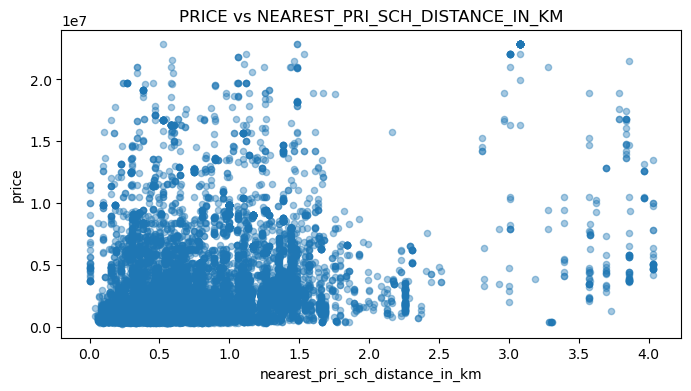

In [22]:
plot_scatterplot(df, X='nearest_pri_sch_distance_in_km', y='price', figsize=(8, 4))

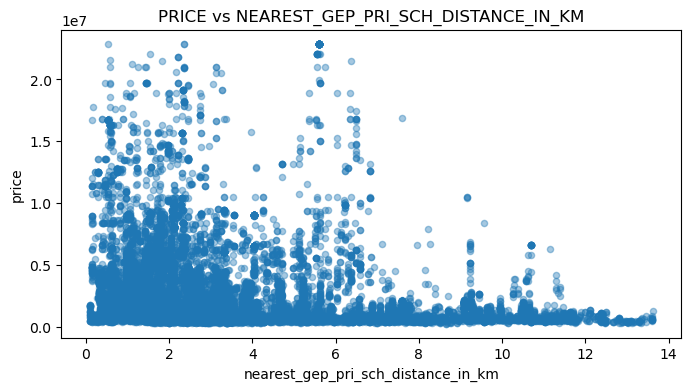

In [23]:
plot_scatterplot(df, X='nearest_gep_pri_sch_distance_in_km', y='price', figsize=(8, 4))

In [24]:
df = join_with_shopping_malls(df, shopping_malls_df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,population,density,nearest_pri_sch_distance_in_km,nearest_gep_pri_sch_distance_in_km,gep_pri_sch_within_1km,gep_pri_sch_within_1km_2km,gep_pri_sch_outside_2km,pri_sch_within_500m,pri_sch_outside_500m,nearest_mall_distance_in_km
55,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,15120,43101.482326,0.261718,3.344506,0,0,1,1,0,0.519278


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


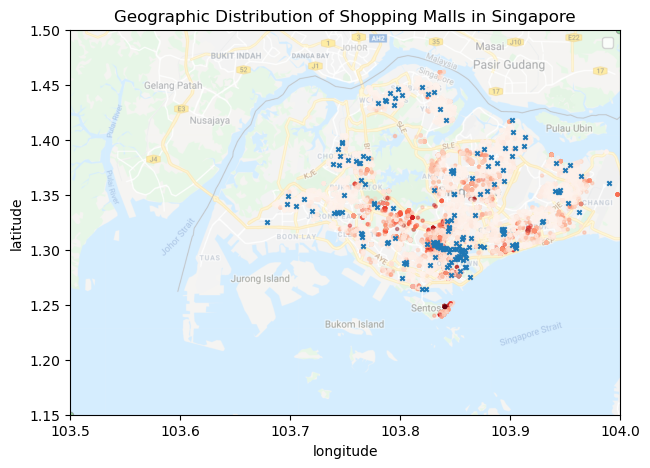

In [25]:
plot_map(df, shopping_malls_df, "Geographic Distribution of Shopping Malls in Singapore", figsize=(10, 5))

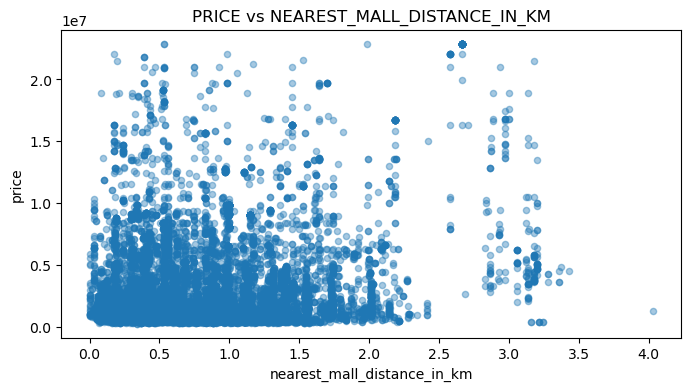

In [52]:
plot_scatterplot(df, X='nearest_mall_distance_in_km', y='price', figsize=(8, 4))

In [31]:
df = join_with_commercial_centres(df, commercial_centres_df)

df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,gep_pri_sch_within_1km_2km,gep_pri_sch_outside_2km,pri_sch_within_500m,pri_sch_outside_500m,nearest_com_centre_distance_in_km,cc_type_BN,cc_type_CR,cc_type_IEBP,cc_type_IEPB,cc_type_IHL
25,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,0,1,1,0,2.47968,1,0,0,0,0


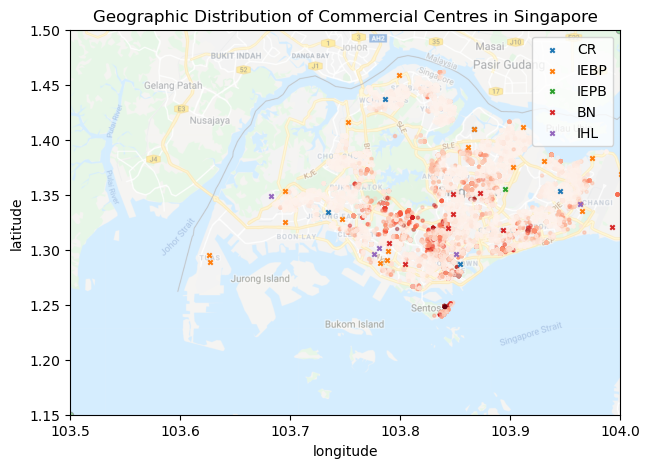

In [27]:
plot_map(df, commercial_centres_df, "Geographic Distribution of Commercial Centres in Singapore", group_col="type", figsize=(10, 5))

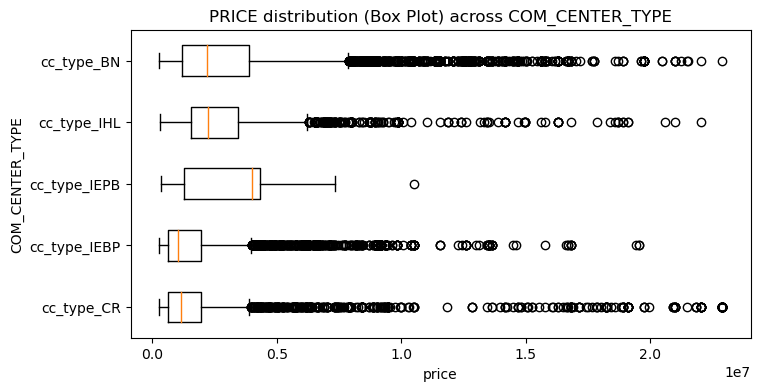

In [32]:
l = ['cc_type_CR', 'cc_type_IEBP', 'cc_type_IEPB', 'cc_type_IHL', 'cc_type_BN']
plot_boxplot(df, feature='COM_CENTER_TYPE', y='price', categories=l, binary=True, figsize=(8, 4))

In [55]:
df.head(1)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,gep_pri_sch_outside_2km,pri_sch_within_500m,pri_sch_outside_500m,nearest_mall_distance_in_km,nearest_com_centre_distance_in_km,cc_type_BN,cc_type_CR,cc_type_IEBP,cc_type_IEPB,cc_type_IHL
25,100043,hdb flat for sale in 118b jalan membina,alexandra / commonwealth (d3),membina 118,property_type_public,tenure_low_year,2003.0,3.0,2.0,1184,...,1,1,0,0.519278,2.47968,1,0,0,0,0


In [72]:
df.columns

Index(['listing_id', 'title', 'address', 'property_name', 'property_type',
       'tenure', 'built_year', 'num_beds', 'num_baths', 'size_sqft',
       'floor_level', 'furnishing', 'available_unit_types', 'total_num_units',
       'property_details_url', 'lat', 'lng', 'elevation', 'subzone',
       'planning_area', 'price', 'property_type_private',
       'property_type_public', 'tenure_high_year', 'tenure_low_year',
       'floor_level_ground', 'floor_level_high', 'floor_level_low',
       'floor_level_mid', 'floor_level_penthouse', 'floor_level_top',
       'furnishing_partial', 'furnishing_unfurnished',
       'furnishing_unspecified', 'nearest_mrt_distance_in_km', 'line_cc',
       'line_ce', 'line_cg', 'line_dt', 'line_ew', 'line_ne', 'line_ns',
       'line_te', 'region', 'area_size', 'population', 'density',
       'nearest_pri_sch_distance_in_km', 'nearest_gep_pri_sch_distance_in_km',
       'gep_pri_sch_within_1km', 'gep_pri_sch_within_1km_2km',
       'gep_pri_sch_outside_2km'

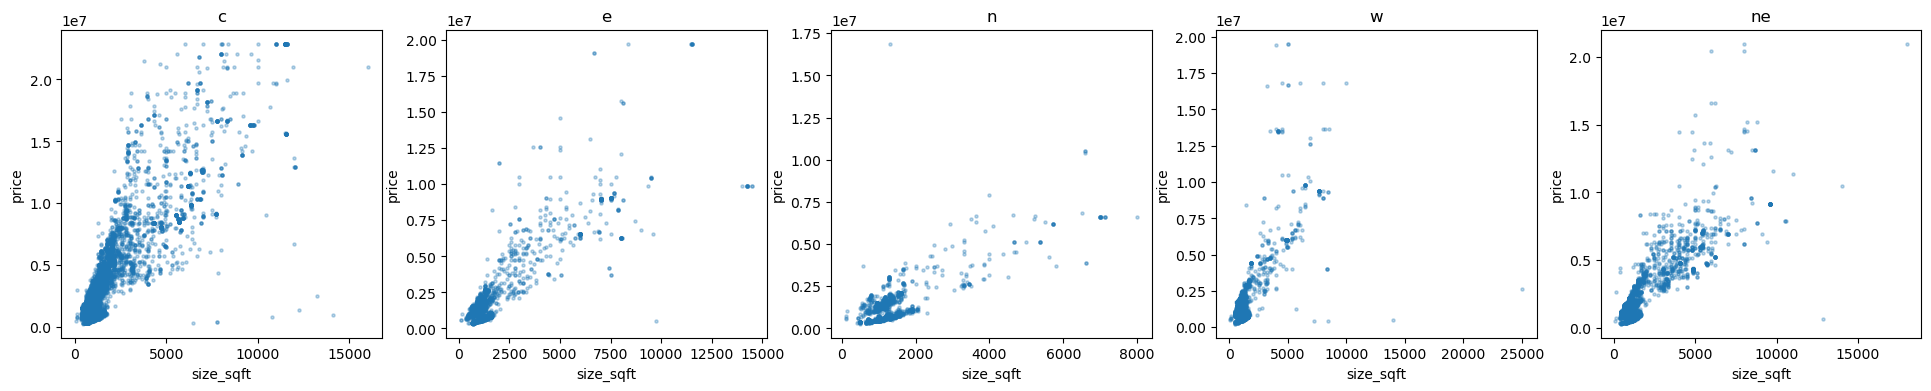

In [79]:
test = df.copy()
test['psf'] = test.price/test.size_sqft

fig, ax = plt.subplots(1, 5)
fig.set_figwidth(24)
fig.set_figheight(4)
for i, c in enumerate(test.region.unique()):
    ax[i].scatter(x=test.size_sqft[test.region==c], y=test.price[test.region==c], s=5, alpha=0.3)
    ax[i].set_xlabel('size_sqft')
    ax[i].set_ylabel('price')
    ax[i].set_title(c)

plt.show()

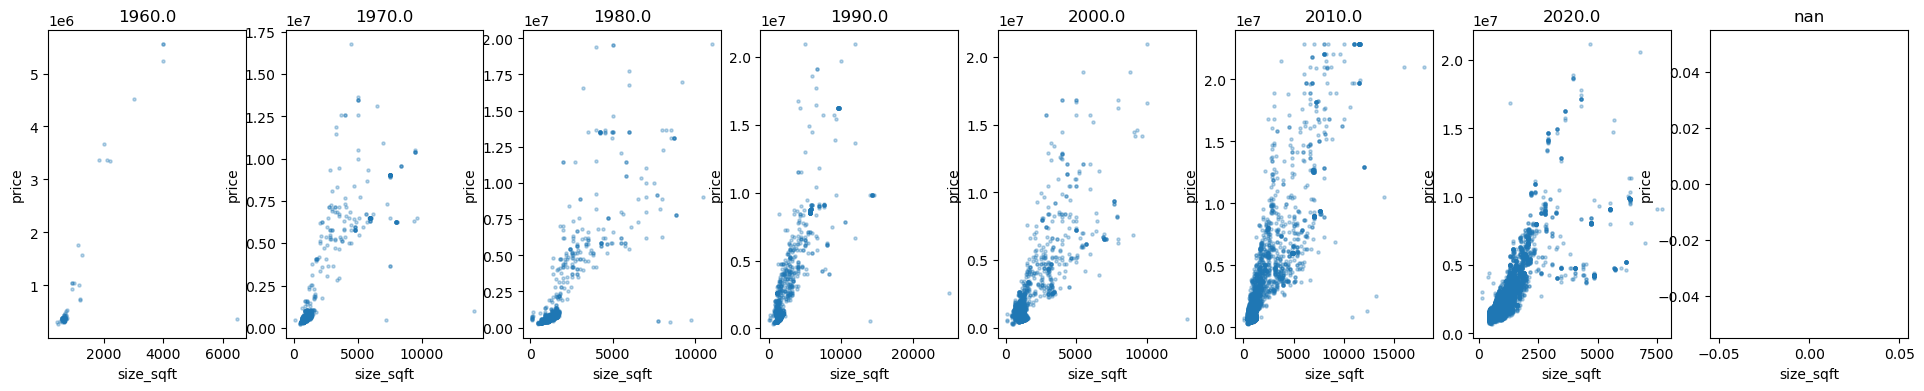

In [99]:
test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/10)*10

fig, ax = plt.subplots(1, len(test.built_year.unique()))
fig.set_figwidth(24)
fig.set_figheight(4)
for i, c in enumerate(sorted(test.built_year.unique())):
    ax[i].scatter(x=test.size_sqft[test.built_year==c], y=test.price[test.built_year==c], s=5, alpha=0.3)
    ax[i].set_xlabel('size_sqft')
    ax[i].set_ylabel('price')
    ax[i].set_title(c)

plt.show()

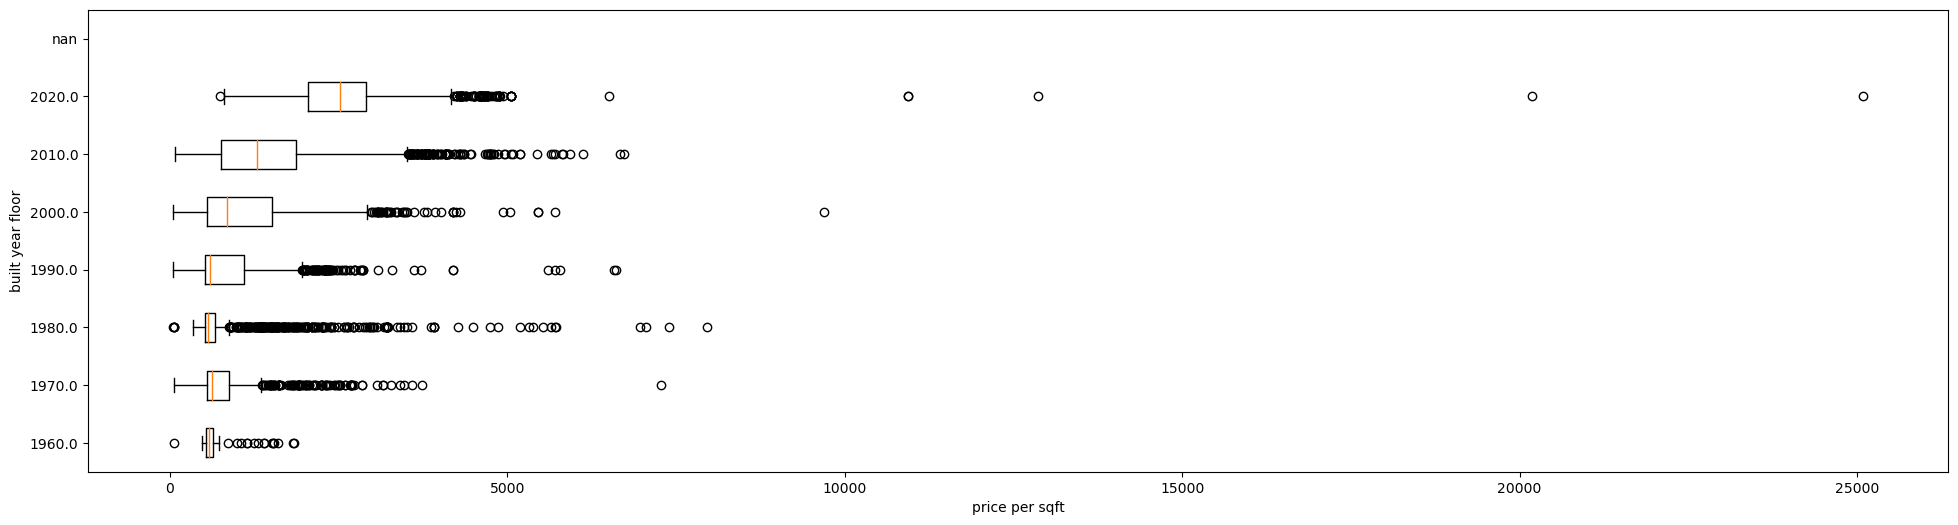

In [136]:
test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/10)*10

fig, ax = plt.subplots()
fig.set_figwidth(24)
fig.set_figheight(6)

categories = sorted(test.built_year.unique())
ax.boxplot(x=[test.psf[test.built_year==c] for c in categories], vert=False)
ax.set_yticklabels(categories)
ax.set_xlabel('price per sqft')
ax.set_ylabel('built year floor')

plt.show()

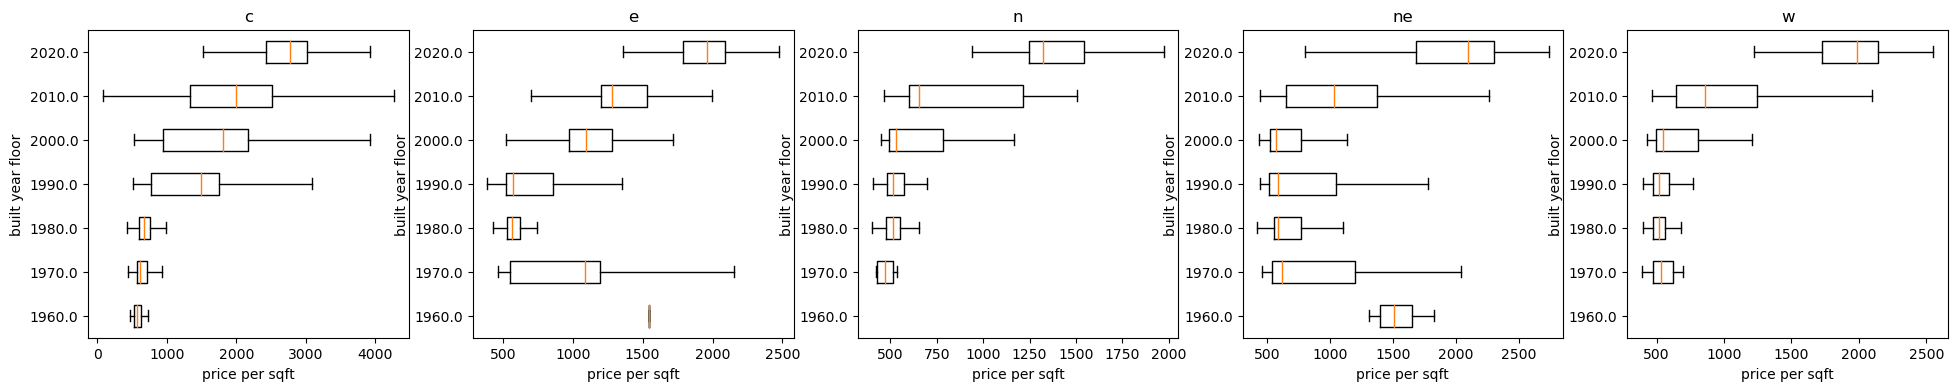

In [133]:
test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/10)*10

fig, ax = plt.subplots(1, 5)
fig.set_figwidth(24)
fig.set_figheight(4)

region_categories = sorted(test.region.unique())
built_year_categories = sorted([x for x in test.built_year.unique() if ~np.isnan(x)])

for i, r in enumerate(region_categories):
    ax[i].boxplot(x=[test.psf[(test.region==r) & (test.built_year==b)] for b in built_year_categories], vert=False, showfliers=False)
    ax[i].set_yticklabels(built_year_categories)
    ax[i].set_xlabel('price per sqft')
    ax[i].set_ylabel('built year floor')
    ax[i].set_title(r)

plt.show()

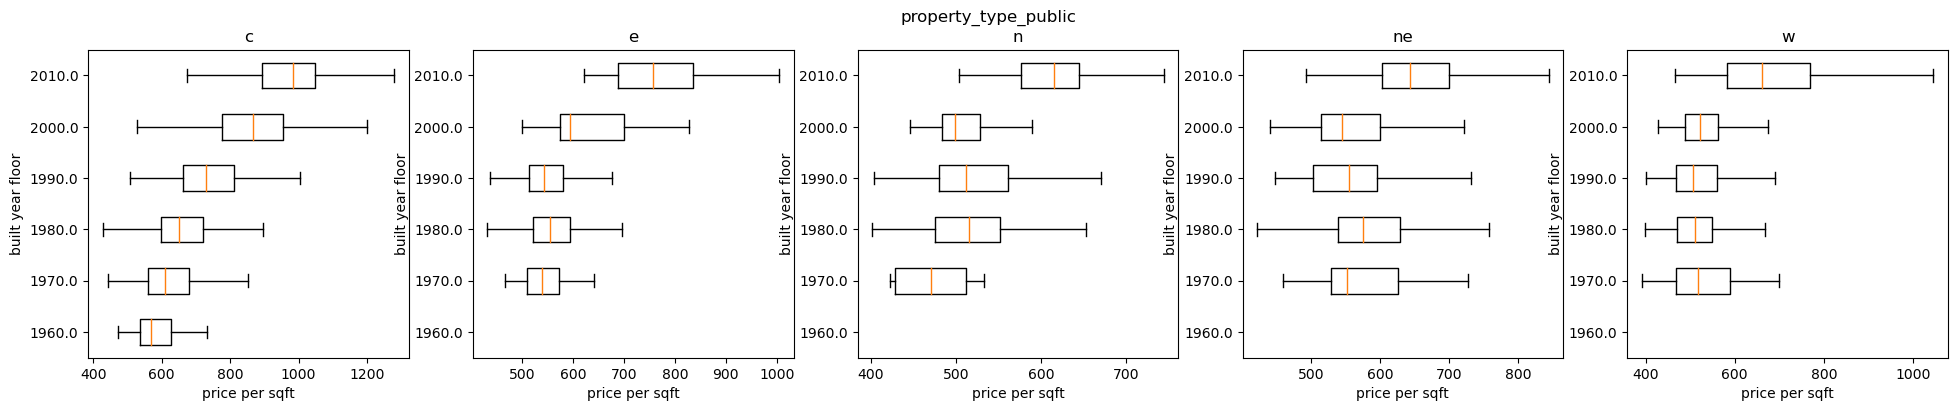

In [134]:
test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/10)*10
test=test[test.property_type_public==1]

fig, ax = plt.subplots(1, 5)
fig.set_figwidth(24)
fig.set_figheight(4)

region_categories = sorted(test.region.unique())
built_year_categories = sorted([x for x in test.built_year.unique() if ~np.isnan(x)])

for i, r in enumerate(region_categories):
    ax[i].boxplot(x=[test.psf[(test.region==r) & (test.built_year==b)] for b in built_year_categories], vert=False, showfliers=False)
    ax[i].set_yticklabels(built_year_categories)
    ax[i].set_xlabel('price per sqft')
    ax[i].set_ylabel('built year floor')
    ax[i].set_title(r)

fig.suptitle('property_type_public')
plt.show()

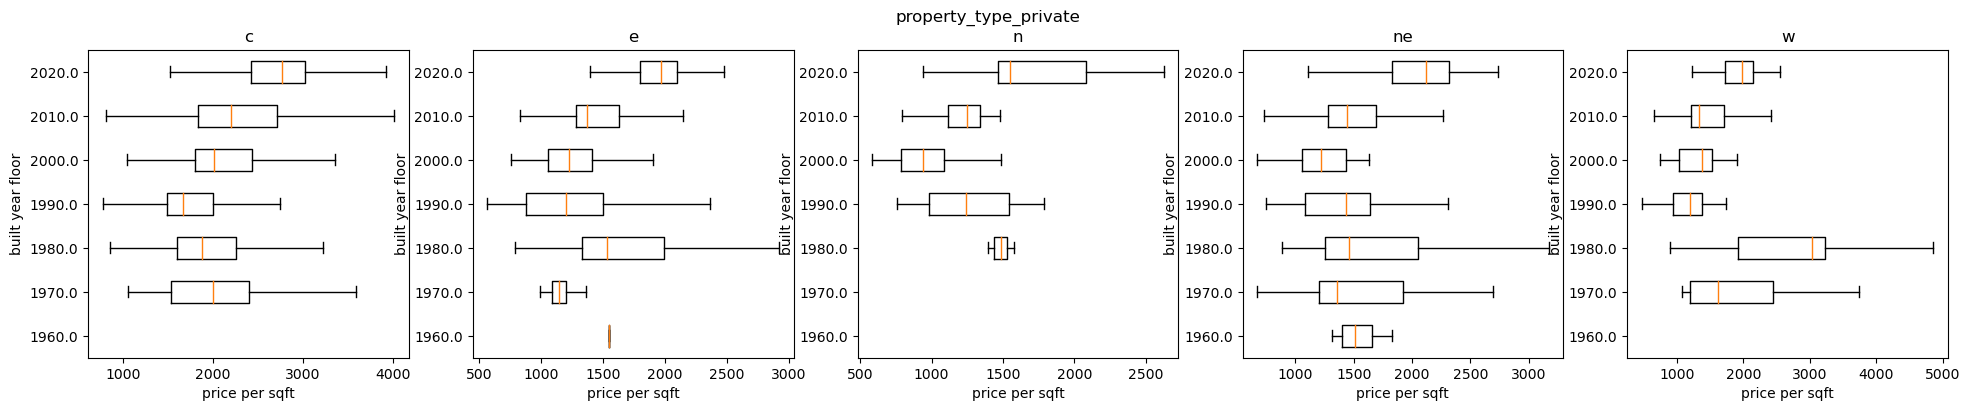

In [135]:
test = df.copy()
test['psf'] = test.price/test.size_sqft
test['built_year'] = np.floor(test.built_year/10)*10
test=test[test.property_type_private==1]

fig, ax = plt.subplots(1, 5)
fig.set_figwidth(24)
fig.set_figheight(4)

region_categories = sorted(test.region.unique())
built_year_categories = sorted([x for x in test.built_year.unique() if ~np.isnan(x)])

for i, r in enumerate(region_categories):
    ax[i].boxplot(x=[test.psf[(test.region==r) & (test.built_year==b)] for b in built_year_categories], vert=False, showfliers=False)
    ax[i].set_yticklabels(built_year_categories)
    ax[i].set_xlabel('price per sqft')
    ax[i].set_ylabel('built year floor')
    ax[i].set_title(r)

fig.suptitle('property_type_private')
plt.show()